In [1]:
import pandas as pd
import os
import numpy as np
import pylab as pl
import datetime
import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.pyplot as plt
import scipy.optimize as opt
import calendar
import sklearn
import seaborn as sn
import PIL.Image
import tkinter as tk

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


from dateutil import relativedelta
from dateutil.relativedelta import *
from dateutil.relativedelta import relativedelta

from datetime import date
from datetime import *
from datetime import datetime, date

 
%matplotlib inline
print(os.getcwd()) 

C:\Users\ferrpe01


In [2]:
df= pd.read_csv(r'C:\Users\ferrpe01\Premier_dfml_NUMBERS.csv',sep=None,delimiter=None,
                 header='infer', names=None, index_col=None, usecols=None, squeeze=False,
                 prefix=None, mangle_dupe_cols=True, dtype=None, engine='python', converters=None, true_values=None,
                 false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None,
                 keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False,
                 infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False,
                 chunksize=None, compression='infer', thousands=None, decimal=',', lineterminator=None,
                 quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None,
                 dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False,
                 low_memory=True, memory_map=False, float_precision=None)
df.head()

,Unnamed: 0,Decisiondate_age,inf_gendername,inf_appointingauthorityidname,inf_accountmjhidname,inf_motivationname,inf_nationalityidname,inf_postalcodecityidname,inf_decisionname,inf_procedureidname
0,0,35.0,0,0,0,0,0,0,0,0
1,1,47.0,1,1,1,1,1,1,0,1
2,2,40.0,1,1,1,1,1,2,0,1
3,3,33.0,1,2,0,2,0,3,0,0
4,4,19.0,0,2,0,2,2,4,0,0


In [3]:
dfml_norm= pd.read_csv(r'C:\Users\ferrpe01\Premier_dfml_NUMBERS.csv',sep=None,delimiter=None,
                 header='infer', names=None, index_col=None, usecols=None, squeeze=False,
                 prefix=None, mangle_dupe_cols=True, dtype=None, engine='python', converters=None, true_values=None,
                 false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None,
                 keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False,
                 infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False,
                 chunksize=None, compression='infer', thousands=None, decimal=',', lineterminator=None,
                 quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None,
                 dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False,
                 low_memory=True, memory_map=False, float_precision=None)
dfml_norm.head()

,Unnamed: 0,Decisiondate_age,inf_gendername,inf_appointingauthorityidname,inf_accountmjhidname,inf_motivationname,inf_nationalityidname,inf_postalcodecityidname,inf_decisionname,inf_procedureidname
0,0,35.0,0,0,0,0,0,0,0,0
1,1,47.0,1,1,1,1,1,1,0,1
2,2,40.0,1,1,1,1,1,2,0,1
3,3,33.0,1,2,0,2,0,3,0,0
4,4,19.0,0,2,0,2,2,4,0,0


In [4]:
dfml_norm.columns = ['index',
                     'Decisiondate_age',
 'inf_gendername',
 'inf_appointingauthorityidname',
 'inf_accountmjhidname',
 'inf_motivationname',
 'inf_nationalityidname',
 'inf_postalcodecityidname',
 'inf_decisionname',
 'inf_procedureidname']
dfml_norm.drop(['index'], axis=1, inplace = True)

In [5]:
#Tableau pour DL
dfml = []
dfml = dfml_norm[['Decisiondate_age','inf_gendername','inf_appointingauthorityidname', 'inf_accountmjhidname'
                  ,'inf_nationalityidname','inf_postalcodecityidname','inf_procedureidname']]

In [6]:
df['inf_motivationname'].head()

0    0
1    1
2    1
3    2
4    2
Name: inf_motivationname, dtype: int64

In [7]:
#Set the features (represented as X) and the label (represented as y):
X = df[['Decisiondate_age','inf_gendername','inf_appointingauthorityidname', 'inf_accountmjhidname'
           , 'inf_nationalityidname','inf_postalcodecityidname','inf_decisionname'
           ,'inf_procedureidname']]
y = df['inf_motivationname']
#'inf_postalcodecityidname','inf_gendername','inf_accountmjhidname','inf_nationalityidname'
#,'inf_appointingauthorityidname','inf_procedureidname'

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='lbfgs', alpha=0.0001
                                     , batch_size='auto', learning_rate='constant', learning_rate_init=0.001
                                     , power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001
                                     , verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True
                                     , early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999
                                     , epsilon=1e-08, n_iter_no_change=10)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
columns = list(df)
#print(columns)

In [11]:
#Autoriser l'affichage d'un plus grand nombre de colonnes
max_columns = len(df.index)
pd.set_option('display.max_columns', max_columns)

In [12]:
#Autoriser l'affichage d'un plus grand nombre de lignes
#max_rows = len(df.index)
#"pd.set_option('display.max_rows', max_rows)

In [13]:
#Enlever titres se finissant par "utc"
#Rechercher noms colonne se terminant par utc en liste boléenne
bol_utc = df.columns.str.endswith('utc')
#bol_utc

#Reprendre les index des True
end_utc = [i for i, val in enumerate(bol_utc) if val] 

In [14]:
#Supprimer les colonnes avec les noms finissant par utc

#Faire liste avec les noms de colonnes utc
list_utc = []
i = 0
while i < len(end_utc):
    a=end_utc[i]
    #print(a)
    b=df.columns[a]
    #print(b)
    list_utc.append(b)
    i += 1
    
i = 0
while i < len(list_utc):
    a=list_utc[i]
    df.drop(labels=None, axis=1, index=None, columns=([a]), level=None, inplace=True, errors='raise')
    i += 1
len(df.index)

15842

In [15]:
#Enlever titres se finissant par "utc.1"
#Rechercher noms colonne se terminant par utc.1 en liste boléenne
bol_utc1 = df.columns.str.endswith('utc.1')
#bol_utc.1

#Reprendre les index des True 
end_utc1 = [i for i, val in enumerate(bol_utc1) if val] #end_utc

#Faire liste avec les noms de colonnes utc
list_utc1 = []
    
i = 0
while i < len(end_utc1):
    a=end_utc1[i]
   # print(a)
    b=df.columns[a]
    #print(b)
    list_utc1.append(b)
    i += 1
while i < len(list_utc1):
    a=list_utc1[i]
    df.drop(labels=None, axis=1, index=None, columns=([a]), level=None, inplace=True, errors='raise')
    i += 1
len(df.columns)

10

In [16]:
#Enlever titres se finissant par "yominame"
#Rechercher noms colonne se terminant par yominame en liste boléenne
bol_yominame = df.columns.str.endswith('yominame')
#bol_yominame

#Reprendre les index des True
end_yominame = [i for i, val in enumerate(bol_yominame) if val] 
#end_yominame

#Faire liste avec les noms de colonnes yominame
list_yominame = []
i = 0
while i < len(end_yominame):
    a=end_yominame[i]
    #print(a)
    b=df.columns[a]
    #print(b)
    list_yominame.append(b)
    i = i + 1
#print(list_yominame)

#Eliminer les colonnes yominame
i = 0
while i < len(list_yominame):
    a=list_yominame[i]
    df.drop(labels=None, axis=1, index=None, columns=([a]), level=None, inplace=True, errors='raise')
    i = i + 1
#len(df.columns)

In [17]:
#i = 1
#while i<=2:
#    delta = relativedelta(df.inf_decisiondateDATE[i], df.inf_birthdayDATE[i])
#    delta
#    i =+1

In [18]:
#def intck_year( start, end ):
 #   closure_offender = relativedelta.relativedelta( pd.to_datetime( end ), pd.to_datetime( start ) )
 #   return closure_offender.years

#offender_age = []
#Changer colones en numéric


In [19]:
#df["AgeOffenderCLOSURE"] = df["AgeOffenderCLOSURE"].astype('str')
#df.head()

In [20]:
# Examiner le tableau
#df.head()
#df
#Types des colonnes
#df.describe

In [21]:
#Check memory usage
#can be used on Pandas dataframes to see the amount of memory used (in bytes) for each column.
#It’s useful when building machine learning models which may require a lot memory in training.

#df.memory_usage(deep=True)

In [22]:
# Montrer le résultat
#df.head()
#df.dtypes
#df

In [23]:
#Exporter en CSV
df.to_csv(r'C:\Users\ferrpe01\desktop\Paul_le_dubitatif2_CSV_.csv'
         , sep=';', na_rep='/', float_format=None, columns=None, header=True, index=True,index_label=None
          , mode='w', encoding=None, compression='infer', quoting=None, quotechar='"',line_terminator=None
          , chunksize=None, tupleize_cols=None, date_format=None, doublequote=True,escapechar=None, decimal=',')

In [24]:
#Exporter en xlxs
#df.to_excel(r'C:\Users\ferrpe01\desktop\Paul_le_dubitatif_Excel_2.xlsx')

In [25]:
#df['TypeText'].value_couts()

In [26]:
#df.describe(percentiles=([.25, .5, .75]), include='all', exclude=None)

In [27]:
#Tableau pour ML
dfml = []
dfml = df[['Decisiondate_age','inf_gendername','inf_appointingauthorityidname', 'inf_accountmjhidname'
           , 'inf_motivationname','inf_nationalityidname','inf_postalcodecityidname','inf_decisionname'
           ,'inf_procedureidname']]
dfml.head()

,Decisiondate_age,inf_gendername,inf_appointingauthorityidname,inf_accountmjhidname,inf_motivationname,inf_nationalityidname,inf_postalcodecityidname,inf_decisionname,inf_procedureidname
0,35.0,0,0,0,0,0,0,0,0
1,47.0,1,1,1,1,1,1,0,1
2,40.0,1,1,1,1,1,2,0,1
3,33.0,1,2,0,2,0,3,0,0
4,19.0,0,2,0,2,2,4,0,0


In [28]:
#dfml.describe(percentiles=([.25, .5, .75]), include='all', exclude=None)

In [29]:
#dfml.index

In [30]:
dfml.to_csv(r'C:\Users\ferrpe01\desktop\Premier_dfml_CSV_.csv'
         , sep=';', na_rep='/', float_format=None, columns=None, header=True, index=True,index_label=None
          , mode='w', encoding=None, compression='infer', quoting=None, quotechar='"',line_terminator=None
          , chunksize=None, tupleize_cols=None, date_format=None, doublequote=True,escapechar=None, decimal=',')

In [31]:
print ("Shape of dataset: ", dfml.shape)
#dfml.head(5)

Shape of dataset:  (15842, 9)


In [32]:
inf_gendernameLIST=dfml.inf_gendername.tolist()

In [33]:
inf_decisionnameLIST=dfml.inf_decisionname.tolist()

In [34]:
inf_accountmjhidnameLIST=dfml.inf_accountmjhidname.tolist()

In [35]:
# Eliminer les lignes "deceased"
indexNames = df[ df['inf_decisionname'] == "Deceased" ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
len(df.index)
indexNames

C:\Users\ferrpe01\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Int64Index([], dtype='int64')

In [36]:
# RANDOM FOREST SUR DFML

#Transformer les données des colonnes en chiffres


In [37]:
#dfml_sexe = dfml['inf_gendername'].unique().tolist()
#dfml['inf_gendername'].replace(to_replace='Male', value=1, inplace=True, limit=None, regex=False, method='pad')#dfml['inf_gendername'].replace(to_replace='Female', value=0, inplace=True, limit=None, regex=False, method='pad')

In [38]:
# Grouper par age de 5


In [39]:
dfml_sexe = dfml['inf_gendername'].unique().tolist()
dfml_sexe

[0, 1]

In [40]:
dfml_am = dfml['inf_appointingauthorityidname'].unique().tolist()
dfml_am

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145]

In [41]:
dfml_mj = dfml['inf_accountmjhidname'].unique().tolist()
dfml_mj

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [42]:
dfml_decision = dfml['inf_decisionname'].unique().tolist()
dfml_decision

[0, 1, 2, 3]

In [43]:
dfml_motivation = dfml['inf_motivationname'].unique().tolist()
dfml_motivation

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [44]:
dfml_nationalite = dfml['inf_nationalityidname'].unique().tolist()
dfml_nationalite

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91]

In [45]:
#OPTION NON RETENUE DE NORMALIZER

#Normalize columns values
x = dfml.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfml_norm = pd.DataFrame(x_scaled)

dfml_norm.to_csv(r'C:\Users\ferrpe01\desktop\Premier_Deep_learning_.csv'
         , sep=';', na_rep='/', float_format=None, columns=None, header=True, index=True,index_label=None
          , mode='w', encoding=None, compression='infer', quoting=None, quotechar='"',line_terminator=None
          , chunksize=None, tupleize_cols=None, date_format=None, doublequote=True,escapechar=None, decimal=',')
dfml_norm

,0,1,2,3,4,5,6,7,8
0,0.411765,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.552941,1.0,0.006897,0.058824,0.038462,0.010989,0.001053,0.000000,0.142857
2,0.470588,1.0,0.006897,0.058824,0.038462,0.010989,0.002105,0.000000,0.142857
3,0.388235,1.0,0.013793,0.000000,0.076923,0.000000,0.003158,0.000000,0.000000
4,0.223529,0.0,0.013793,0.000000,0.076923,0.021978,0.004211,0.000000,0.000000
5,0.258824,0.0,0.020690,0.000000,0.115385,0.000000,0.005263,0.333333,0.000000
6,0.282353,0.0,0.027586,0.000000,0.153846,0.000000,0.006316,0.666667,0.285714
7,0.258824,0.0,0.034483,0.000000,0.076923,0.000000,0.007368,0.000000,0.000000
8,0.388235,0.0,0.041379,0.117647,0.038462,0.032967,0.008421,0.000000,0.142857
9,0.352941,1.0,0.048276,0.000000,0.192308,0.000000,0.009474,0.666667,0.285714


In [46]:
#Set the features (represented as X) and the label (represented as y):
X = dfml[['Decisiondate_age','inf_postalcodecityidname','inf_procedureidname','inf_appointingauthorityidname'
          ,'inf_nationalityidname','inf_accountmjhidname', 'inf_gendername']]
y = dfml['inf_motivationname']
len(dfml['inf_motivationname'])
#

15842

In [47]:
d = {'Variables Indépendantes': ['Decisiondate_age','inf_postalcodecityidname','inf_procedureidname','inf_appointingauthorityidname'
          ,'inf_nationalityidname','inf_accountmjhidname', 'inf_gendername']
     , 'Classement': [1,2,3,4,5,6,7]}
Features_Importance = pd.DataFrame(data=d)
Features_Importance
#

,Variables Indépendantes,Classement
0,Decisiondate_age,1
1,inf_postalcodecityidname,2
2,inf_procedureidname,3
3,inf_appointingauthorityidname,4
4,inf_nationalityidname,5
5,inf_accountmjhidname,6
6,inf_gendername,7


In [48]:
Features_Importance.to_csv(r'C:\Users\ferrpe01\desktop\Features_Importance_7.csv'
         , sep=';', na_rep='/', float_format=None, columns=None, header=True, index=True,index_label=None
          , mode='w', encoding=None, compression='infer', quoting=None, quotechar='"',line_terminator=None
          , chunksize=None, tupleize_cols=None, date_format=None, doublequote=True,escapechar=None, decimal=',')

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [51]:
#print (X_test) #test dataset (without the actual outcome)
#print (y_pred) #predicted values

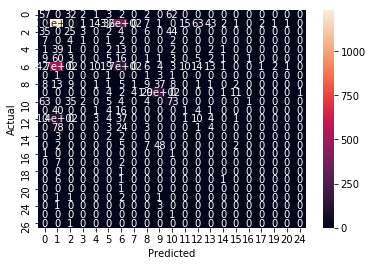

In [52]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [53]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.4498863923251704


0    0.311695
1    0.291428
2    0.140424
3    0.115887
4    0.082008
5    0.049099
6    0.009459
dtype: float64


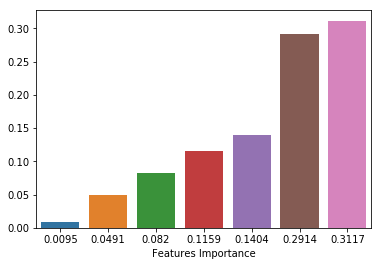

<Figure size 432x288 with 0 Axes>

In [54]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

sn.barplot(x=round(featureImportances,4), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()
plt.savefig('Features_Importance_7.png', dpi = 'figure', facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None)

In [55]:
...
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 350)
canvas1.pack()

# Age
label1 = tk.Label(root, text='                                                     Age:')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root)
canvas1.create_window(270, 100, window=entry1)

# Sexe
#label2 = tk.Label(root, text='                                            Sexe:     ')
#canvas1.create_window(120, 120, window=label2)

#entry2 = tk.Entry (root)
#canvas1.create_window(270, 120, window=entry2)

# Authorité mandante
#label3 = tk.Label(root, text='     Authorité mandante: ')
#canvas1.create_window(140, 140, window=label3)

#entry3 = tk.Entry (root)
#canvas1.create_window(270, 140, window=entry3)

# Maison de justice
#label4 = tk.Label(root, text='      Maison de Justice:           ')
#canvas1.create_window(160, 160, window=label4)

#entry4 = tk.Entry (root)
#canvas1.create_window(270, 160, window=entry4)

# Décision finale
#label5 = tk.Label(root, text='     Décision finale: ')
#canvas1.create_window(160, 160, window=label5)

#entry5 = tk.Entry (root)
#canvas1.create_window(270, 160, window=entry5)

# Procedure
label5 = tk.Label(root, text='          Procedure:                  ')
canvas1.create_window(180, 180, window=label5)

entry5 = tk.Entry (root)
canvas1.create_window(270, 180, window=entry5)


# Nationalité
#label6 = tk.Label(root, text='   Nationalité:                        ')
#canvas1.create_window(200, 200, window=label6)

#entry6 = tk.Entry (root)
#canvas1.create_window(270, 200, window=entry6)

# Code Postal
#label7 = tk.Label(root, text='Code Postal:                                  ')
#canvas1.create_window(220, 220, window=label7)

#entry7 = tk.Entry (root)
#canvas1.create_window(270, 220, window=entry7)


def values(): 
    global age
    age = float(entry1.get()) 
    
    global sexe
    sexe = float(entry2.get()) 
    
    global am
    am = float(entry3.get()) 
    
    global mj
    mj = float(entry4.get()) 

    global procedure
    procedure = float(entry5.get())
       
    global nationalite
    nationalite = float(entry6.get())
       
    global cp
    cp = float(entry7.get()) 

    Prediction_result  = ('  Résultat Prédit: ', clf.predict([[age,procedure]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='sky blue')
    canvas1.create_window(270, 300, window=label_Prediction)
    
button1 = tk.Button (root, text='      Prédiction      ',command=values, bg='green', fg='white', font=11)
canvas1.create_window(270, 260, window=button1)
 
root.mainloop()
...

Ellipsis

In [56]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=10)# Train
#model.fit(iris.data, iris.target)
# Extract single tree
estimator = clf.estimators_[5]

In [57]:
from sklearn.tree import export_graphviz# Export as dot file
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
#clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf) 
sklearn.tree.export_graphviz(clf, out_file=None, max_depth=None, feature_names=None, class_names=None,
                             label= 'all', filled=False, leaves_parallel=False, impurity=True, node_ids=False,
                             proportion=False, rotate=False, rounded=False,
                             special_characters=False, precision=3)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.75\\nsamples = 11881\\nvalue = [442, 5277, 351, 51, 159, 403, 2379, 29, 299, 645\\n509, 168, 577, 303, 25, 167, 12, 36, 7, 22, 5, 1\\n1, 9, 2, 2]"] ;\n1 [label="X[3] <= 40.5\\ngini = 0.761\\nsamples = 1577\\nvalue = [442, 0, 351, 46, 6, 93, 39, 0, 74, 0, 509, 0\\n0, 0, 1, 0, 12, 0, 2, 0, 0, 0, 0, 1, 0, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 337.5\\ngini = 0.765\\nsamples = 1214\\nvalue = [358, 0, 289, 32, 5, 79, 30, 0, 56, 0, 351, 0\\n0, 0, 1, 0, 10, 0, 2, 0, 0, 0, 0, 0, 0, 1]"] ;\n1 -> 2 ;\n3 [label="X[0] <= 55.5\\ngini = 0.766\\nsamples = 1079\\nvalue = [324, 0, 272, 28, 5, 68, 29, 0, 51, 0, 290, 0\\n0, 0, 0, 0, 9, 0, 2, 0, 0, 0, 0, 0, 0, 1]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 8.5\\ngini = 0.768\\nsamples = 1039\\nvalue = [305, 0, 270, 25, 5, 66, 29, 0, 51, 0, 276, 0\\n0, 0, 0, 0, 9, 0, 2, 0, 0, 0, 0, 0, 0, 1]"] ;\n3 -> 4 ;\n5 [label="X[4] <= 48.5\\ngini = 0.747\\nsamp

In [58]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


2

In [59]:
from IPython.display import Image
#Image(filename = 'tree.png')
IPython.display.Image(data=None, url=None, filename='Tree.png'
 , format='png', embed=None, width=None, height=None
 , retina=False, unconfined=False, metadata=None)

FileNotFoundError: [Errno 2] No such file or directory: 'Tree.png'